# Notebook 7 - Creating Orientation Data from Strike Data

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from WMS Services or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, choosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present how vector data can be loaded into GemGIS with the [GeoPandas](https://geopandas.org/) package and how it can be manipulated for the usage in [GemPy](https://github.com/cgre-aachen/gempy). This includes the extraction of coordinates and height values from a GeoDataFrame and DEM, respectively. 

- [What are Interfaces and Orientations?](#intandor)
- [What is GemPy?](#gempy)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)

- [Example 1 - Extract Orientations from a W-E striking planar surface](#ex1)
- [Example 2 - Extract Orientations from a NW-SE striking fold](#ex2)
- [Example 3 - Extract Orientations from a surface with curved strike lines](#ex3)
- [Example 4 - Extract Orientations from multiple surfaces and a fault](#ex4)


<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy`uses an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and a `polarity` values is needed. The polarity is usually set to 1. 

Strike, in geology, is the direction of the line formed by the intersection of a fault, bed, or other planar feature and a horizontal plane. Strike indicates the dip orientation or position of linear structural features such as faults, beds, joints, and folds.

<img src="../data/Images/orientations.jpg" width="500">

Source: https://www.britannica.com/science/strike-geology <br>
Image from: Geological Structures: a Practical Introduction -  John W.F. Waldron and Morgan Snyder 


<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc




<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is currently under development and only available at https://github.com/cgre-aachen/gemgis. pip and conda versions including a documentations page will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data
* `misc.py` - file containing functions for custom tasks 



If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class in later tutorials, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.6.1 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the working with raster files notebook.

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
print(gg)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Thu Oct 29 19:17:13 2020 Mitteleuropäische Zeit

                OS : Windows
            CPU(s) : 16
           Machine : AMD64
      Architecture : 64bit
       Environment : Jupyter

  Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.19.2
            scooby : 0.5.6
            owslib : 0.20.0
            pandas : 1.1.3
           shapely : 1.7.1
           pyvista : 0.26.1
          rasterio : 1.1.7
         geopandas : 0.8.1
          requests : 2.24.0
             scipy : 1.5.2
           skimage : 0.17.2
        matplotlib : 3.3.1
--------------------------------------------------------------------------------

<a id='ex1'></a>
# Example 1 - Extract Orientations from a W-E striking planar surface

As a first example we will extract orientation values based on intersections of layer boundaries (purple) with topography (green). Intersecting points with the same altitude can be connected to form strike lines (purple lines). These lines represent isolines of outcropping layers assuming that the topography is horizontal (green planes). Based on the contour spacing and the height difference, the slope and hence the dipping angle $\theta$ can be estimated according to

$$tan(\theta) = m = \frac{\Delta y}{\Delta x}$$

and 

$$\theta = tan^{-1}\left( \frac{\Delta y}{\Delta x}\right)$$.

<img src="../data/Images/orientations.jpg" width="500">

Image from: Geological Structures: a Practical Introduction -  John W.F. Waldron and Morgan Snyder 

## Load Data

In [3]:
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')
gdf = gpd.read_file('../../gemgis/data/Test1/points_strike.shp')

## Inspect Data

**In order for GemGIS to be able to calculate the orientations, a unique ID needs to be provided for each set of strike points. GemGIS will then calculate the strike between strike line 1 and 2, 2 and 3 and so forth. This way, altitudes can be present multiple times as it is the common case for folds.**

In [4]:
gdf.head()

,id,Z,formation,geometry
0,2,400,Ton,POINT (62.513 382.832)
1,3,500,Ton,POINT (141.489 555.155)
2,4,600,Ton,POINT (191.943 720.949)
3,5,700,Ton,POINT (287.541 893.302)
4,5,700,Ton,POINT (481.908 893.302)


## Set Extent

In [5]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Plot Data

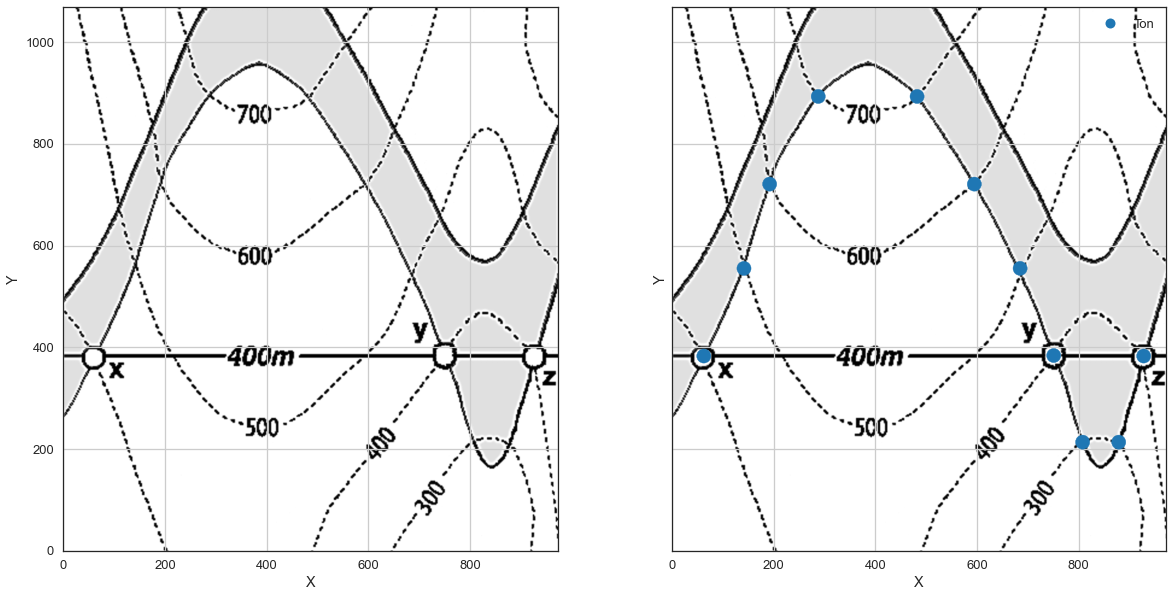

In [6]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the interfaces on the geological map
gdf.plot(ax=ax2, column = 'formation', legend = True, s = 200, aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Create LineString GeoDataFrame

We are creating a LineString GeoDataFrame based on the points to visualize the strike lines. 

In [7]:
linestring_gdf = gg.utils.create_linestring_gdf(gdf)
linestring_gdf

,geometry,Z,formation
0,"LINESTRING (807.441 213.514, 878.392 213.516)",300,Ton
1,"LINESTRING (62.513 382.832, 750.576 383.831, 9...",400,Ton
2,"LINESTRING (141.489 555.155, 684.515 555.153)",500,Ton
3,"LINESTRING (191.943 720.949, 594.500 720.942)",600,Ton
4,"LINESTRING (287.541 893.302, 481.908 893.302)",700,Ton


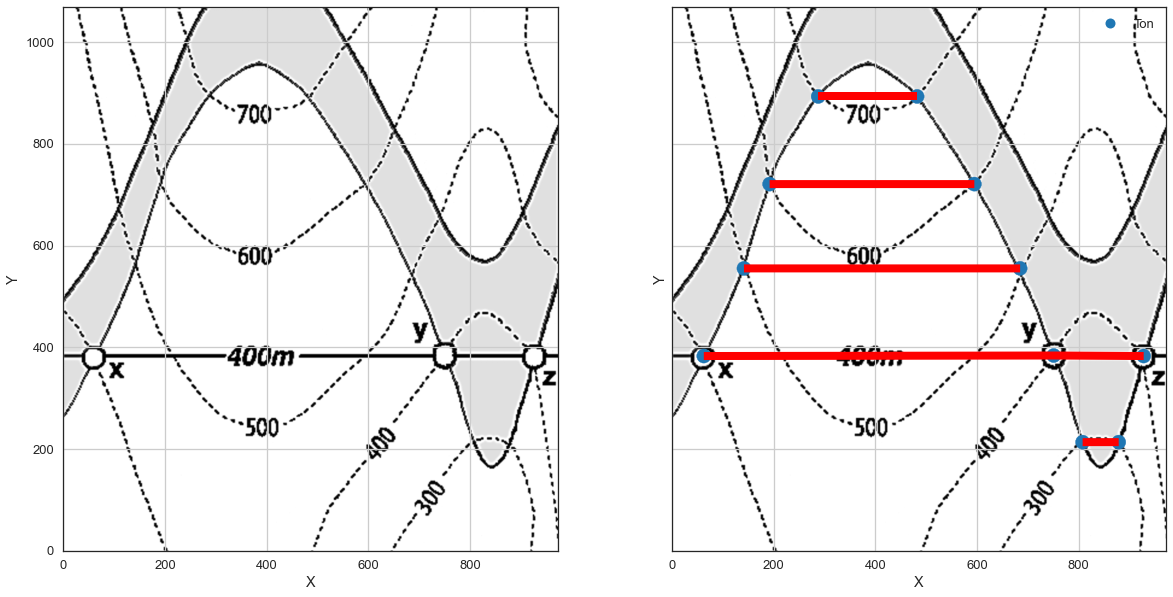

In [8]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the interfaces on the geological map
gdf.plot(ax=ax2, column = 'formation', legend = True, s = 200, aspect='equal')
linestring_gdf.plot(ax=ax2, linewidth=8, color='red', aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Calculate Orientations

Orientations are calculated for one formation with eigenvector analysis. The orientations are then returned for the midpoint of each strike line and the DataFrame can directly be used for `GemPy`. Examples with multiple formations follow.

In [9]:
orientations = gg.utils.calculate_orientations(gdf)
orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,513.32,451.96,440.00,30.17,179.98,1,Ton
1,403.11,638.05,550.00,31.10,180.00,1,Ton
2,388.97,807.12,650.00,30.12,180.00,1,Ton
3,384.72,893.30,700.00,90.00,180.00,1,Ton


## Plot Orientations

(0.0, 972.0)

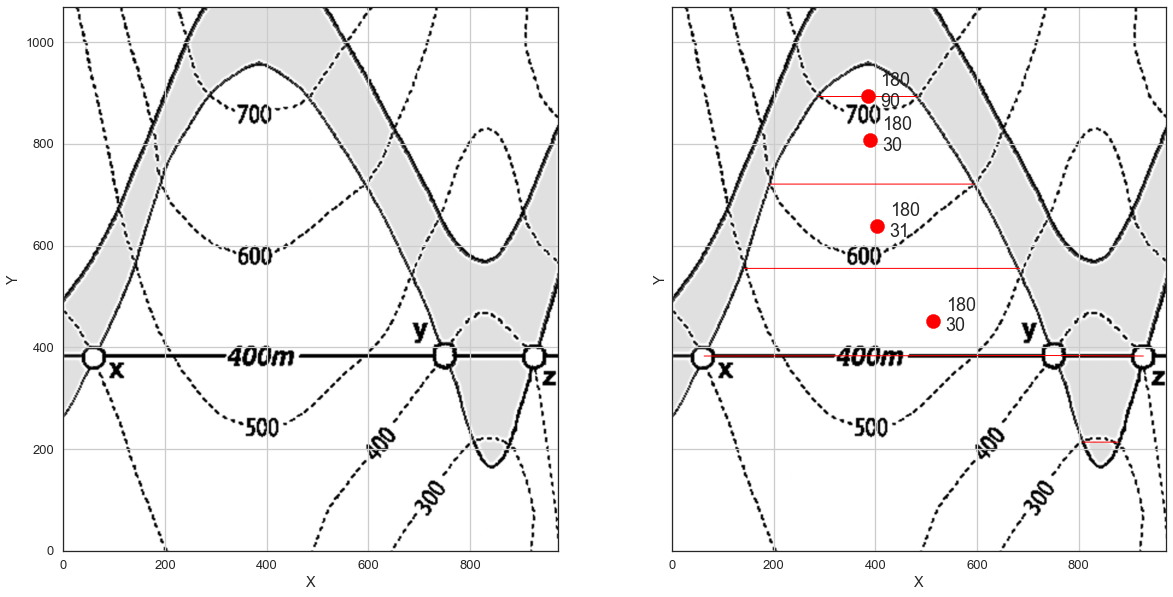

In [10]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(20, 10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin='lower', cmap='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2], extent[3])
ax1.set_xlim(extent[0], extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin='lower', cmap='gray')
# Plotting the interfaces on the geological map
ax2.scatter(orientations['X'], orientations['Y'], s=200, color='red')
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]+20,
          s=round(orientations['azimuth'][i])) for i in range(len(orientations))]
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]-20,
          s=round(orientations['dip'][i])) for i in range(len(orientations))]
linestring_gdf.plot(ax=ax2, linewidth=1, color='red', aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2], extent[3])
ax1.set_xlim(extent[0], extent[1])

<a id='ex2'></a>
# Example 2 - Extract Orientations from a NW-SE striking fold

The second example shows a NW-SE striking anticline. 

<img src='../data/examples/example2/task2.png' width="300">

## Load Data

In [11]:
geological_map = rasterio.open('../../gemgis/data/examples/example2/task2.tif')
gdf = gpd.read_file('../../gemgis/data/examples/example2/lines_strike.shp')

## Inspect Data

In [12]:
gdf.head()

,id,Z,formation,geometry
0,1,100,Layer1,"LINESTRING (2.577 102.527, 78.137 1.951)"
1,2,150,Layer1,"LINESTRING (3.720 276.250, 208.683 2.713)"
2,3,200,Layer1,"LINESTRING (1.942 442.607, 335.546 1.697)"
3,4,250,Layer1,"LINESTRING (1.307 583.693, 438.662 6.395)"
4,5,300,Layer1,"LINESTRING (1.815 721.604, 544.572 2.967)"


## Set Extent

In [13]:
extent = gg.utils.set_extent(0,865,0,866)
extent

[0, 865, 0, 866]

## Plot Data

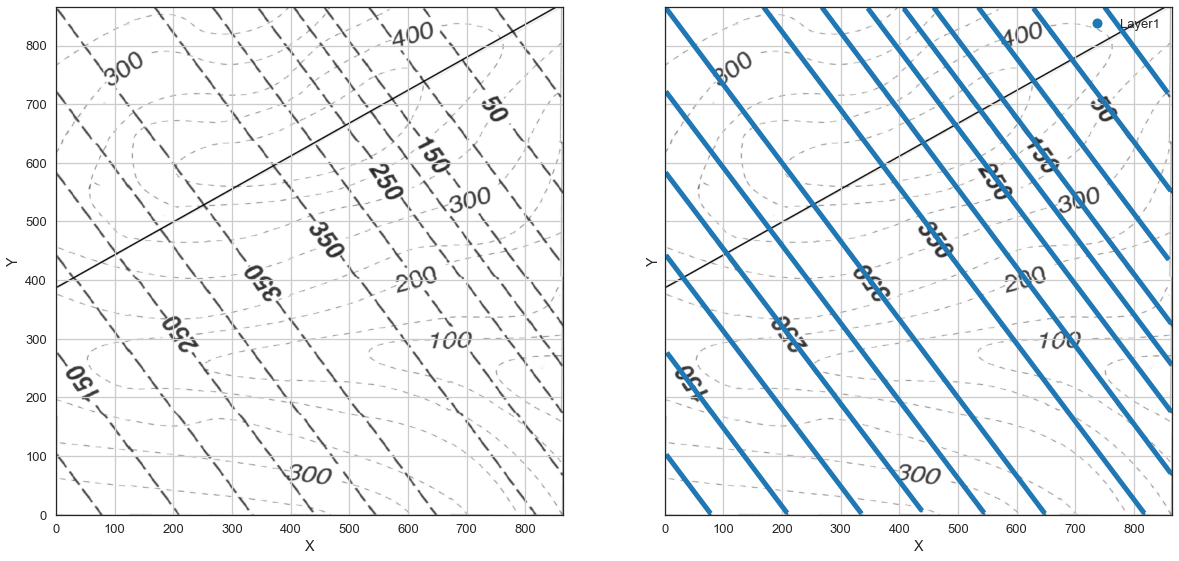

In [14]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the interfaces on the geological map
gdf.plot(ax=ax2, column = 'formation', legend = True, linewidth = 5, aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Calculate Orientations

Orientations are calculated for one formation with eigenvector analysis. The orientations are then returned for the midpoint of each strike line and the DataFrame can directly be used for `GemPy`. Examples with multiple formations follow.

In [15]:
orientations = gg.utils.calculate_orientations(gdf)
orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,73.28,95.86,125.00,25.46,233.15,1,Layer1
1,137.47,180.82,175.00,26.63,232.96,1,Layer1
2,194.36,258.60,225.00,30.51,232.87,1,Layer1
3,246.59,328.66,275.00,31.07,232.90,1,Layer1
4,298.99,397.81,325.00,30.77,233.06,1,Layer1
5,408.95,433.65,350.00,0.00,0.00,1,Layer1
6,529.21,451.02,325.00,32.59,53.11,1,Layer1
7,584.92,494.04,275.00,38.63,53.13,1,Layer1
8,620.16,539.88,225.00,45.66,53.07,1,Layer1
9,648.37,577.66,175.00,50.22,53.07,1,Layer1


## Plot Orientations

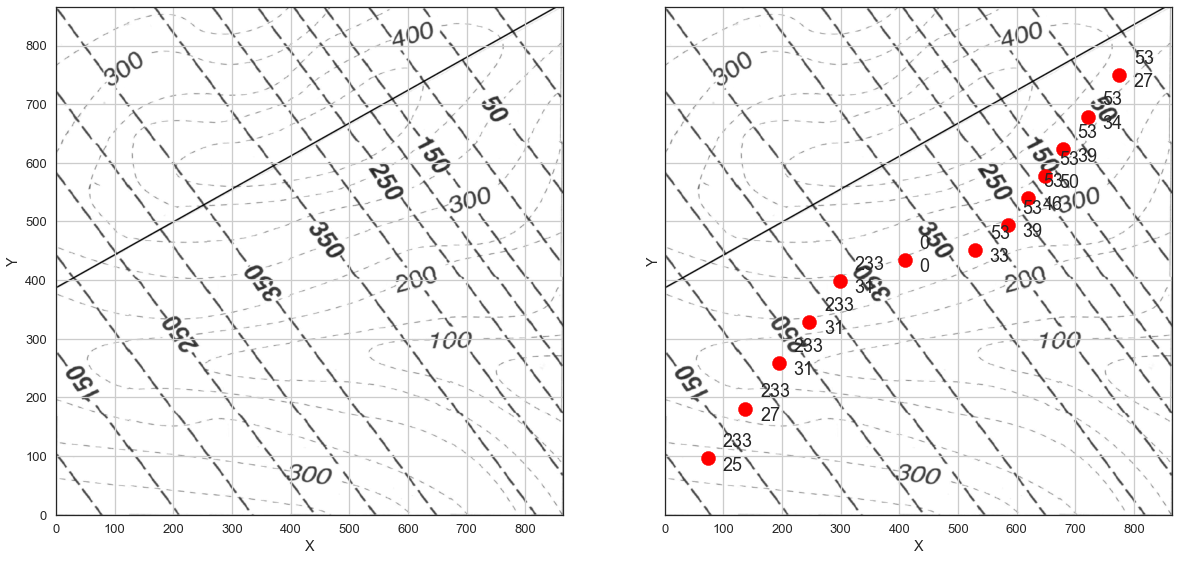

In [16]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(20, 10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin='lower', cmap='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2], extent[3])
ax1.set_xlim(extent[0], extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin='lower', cmap='gray')
# Plotting the interfaces on the geological map
ax2.scatter(orientations['X'], orientations['Y'], s=200, color='red')
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]+20,
          s=round(orientations['azimuth'][i])) for i in range(len(orientations))]
[ax2.text(orientations['X'][i]+25, orientations['Y'][i]-20,
          s=round(orientations['dip'][i])) for i in range(len(orientations))]

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2], extent[3])
ax1.set_xlim(extent[0], extent[1]);

<a id='intandor'></a>
# Example 3 - Extract Orientations from a surface with curved strike lines 

The third example shows a southward dipping layer with curved strike lines. Orientations for this case can also be calculated with `GemGIS`.


<img src="../../gemgis/data/examples/example3/task3.png" width="300">

## Load Data

In [17]:
geological_map = rasterio.open('../../gemgis/data/examples/example3/raster3.tif')
gdf = gpd.read_file('../../gemgis/data/examples/example3/lines_strike.shp')

## Inspect Data

In [18]:
gdf

,id,Z,formation,geometry
0,1,600,Layer1,"LINESTRING (46.044 702.206, 190.042 725.406)"
1,2,500,Layer1,"LINESTRING (49.510 572.074, 271.908 618.474)"
2,3,400,Layer1,"LINESTRING (69.244 368.876, 355.641 452.075)"
3,4,300,Layer1,"LINESTRING (62.310 272.344, 266.042 247.811)"
4,5,200,Layer1,"LINESTRING (54.844 118.745, 312.974 79.279)"
5,6,300,Layer1,"LINESTRING (391.907 261.677, 459.106 340.610)"
6,7,200,Layer1,"LINESTRING (436.706 178.478, 524.172 187.011)"
7,8,600,Layer1,"LINESTRING (463.373 765.139, 612.705 747.006)"
8,9,500,Layer1,"LINESTRING (412.173 672.340, 670.304 668.073)"
9,10,400,Layer1,"LINESTRING (471.906 495.275, 625.505 476.075)"


## Set Extent

In [19]:
extent = gg.utils.set_extent(0,700,0,788)
extent

[0, 700, 0, 788]

## Plot Data

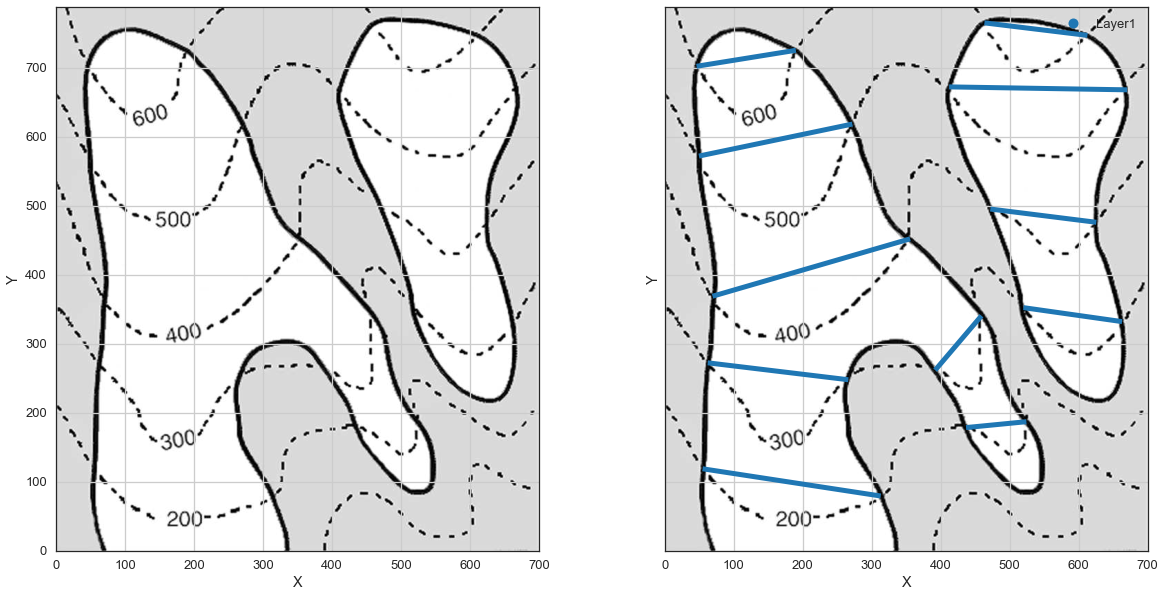

In [20]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the interfaces on the geological map
gdf.plot(ax=ax2, column = 'formation', legend = True, linewidth = 5, aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Calculate Orientations

Orientations are calculated for one formation with eigenvector analysis. The orientations are then returned for the midpoint of each strike line and the DataFrame can directly be used for `GemPy`. Examples with multiple formations follow.

For this example it is important to separate the GeoDataFrame into 4 sub-GeoDataFrames. The first part will represent the the strike lines in the NW (600m-400m), the second the lines in the southwest (300m-200m), the third the lines in the center (300m-200m) and the last one in the NE (600m-300m). 

The orientations are calculated separately and then combined again using `pd.concat([orientations1,...])`

In [21]:
gdf_copy = gdf.copy(deep=True)

In [22]:
gdf1 = gdf_copy[gdf_copy['id']<=3]
gdf1 = gdf1.reset_index()
gdf1

,index,id,Z,formation,geometry
0,0,1,600,Layer1,"LINESTRING (46.044 702.206, 190.042 725.406)"
1,1,2,500,Layer1,"LINESTRING (49.510 572.074, 271.908 618.474)"
2,2,3,400,Layer1,"LINESTRING (69.244 368.876, 355.641 452.075)"


In [23]:
gdf2 = gdf_copy[gdf_copy['id'] >3]
gdf2 = gdf2[gdf2['id'] <=5]
gdf2 = gdf2.reset_index()
gdf2

,index,id,Z,formation,geometry
0,3,4,300,Layer1,"LINESTRING (62.310 272.344, 266.042 247.811)"
1,4,5,200,Layer1,"LINESTRING (54.844 118.745, 312.974 79.279)"


In [24]:
gdf3 = gdf_copy[gdf_copy['id'] >5]
gdf3 = gdf3[gdf3['id'] <=7]
gdf3 = gdf3.reset_index()
gdf3

,index,id,Z,formation,geometry
0,5,6,300,Layer1,"LINESTRING (391.907 261.677, 459.106 340.610)"
1,6,7,200,Layer1,"LINESTRING (436.706 178.478, 524.172 187.011)"


In [25]:
gdf4 = gdf_copy[gdf_copy['id'] >7]
gdf4 = gdf4[gdf4['id'] <=11]
gdf4 = gdf4.reset_index()
gdf4

,index,id,Z,formation,geometry
0,7,8,600,Layer1,"LINESTRING (463.373 765.139, 612.705 747.006)"
1,8,9,500,Layer1,"LINESTRING (412.173 672.340, 670.304 668.073)"
2,9,10,400,Layer1,"LINESTRING (471.906 495.275, 625.505 476.075)"
3,10,11,300,Layer1,"LINESTRING (519.906 352.343, 662.838 332.077)"


In [26]:
orientations1 = gg.utils.calculate_orientations(gdf1)
orientations1

,X,Y,Z,dip,azimuth,polarity,formation
0,139.38,654.54,550.00,38.75,168.98,1,Layer1
1,186.58,502.87,450.00,27.48,165.42,1,Layer1


In [27]:
orientations2 = gg.utils.calculate_orientations(gdf2)
orientations2

,X,Y,Z,dip,azimuth,polarity,formation
0,174.04,179.54,250.00,32.53,187.99,1,Layer1


In [28]:
orientations3 = gg.utils.calculate_orientations(gdf3)
orientations3

,X,Y,Z,dip,azimuth,polarity,formation
0,452.97,241.94,250.00,36.35,148.69,1,Layer1


In [29]:
orientations4 = gg.utils.calculate_orientations(gdf4)
orientations4

,X,Y,Z,dip,azimuth,polarity,formation
0,539.64,713.14,550.00,49.27,182.45,1,Layer1
1,544.97,577.94,450.00,28.47,182.57,1,Layer1
2,570.04,413.94,350.00,36.20,187.56,1,Layer1


In [30]:
orientations = pd.concat([orientations1, orientations2, orientations3, orientations4])
orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,139.38,654.54,550.00,38.75,168.98,1,Layer1
1,186.58,502.87,450.00,27.48,165.42,1,Layer1
0,174.04,179.54,250.00,32.53,187.99,1,Layer1
0,452.97,241.94,250.00,36.35,148.69,1,Layer1
0,539.64,713.14,550.00,49.27,182.45,1,Layer1
1,544.97,577.94,450.00,28.47,182.57,1,Layer1
2,570.04,413.94,350.00,36.20,187.56,1,Layer1


## Plot Orientations

(0.0, 700.0)

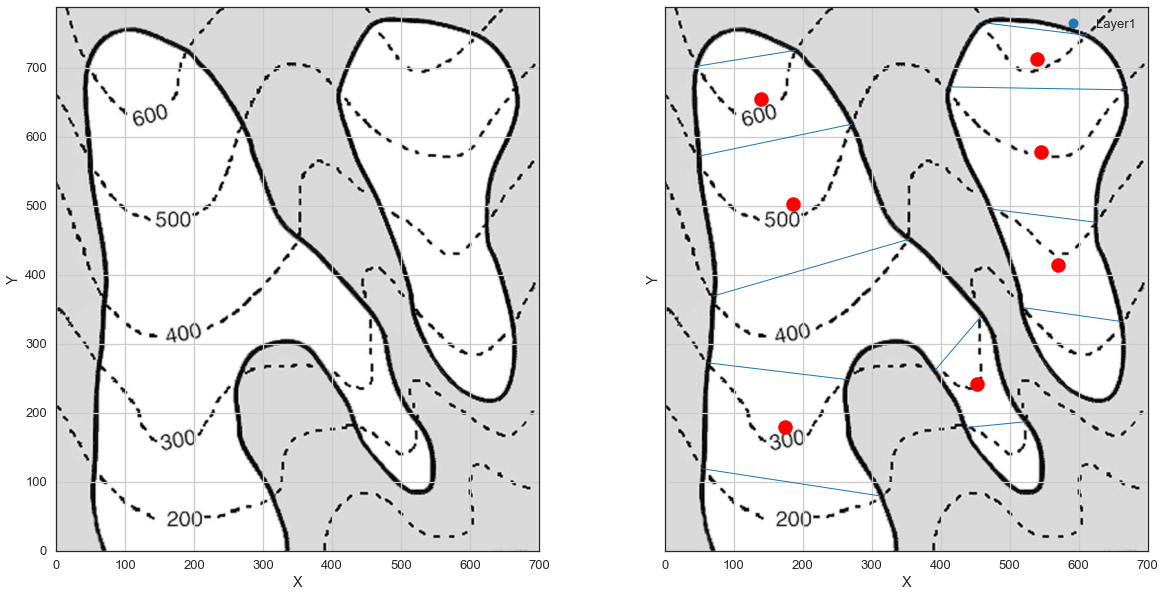

In [31]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(20, 10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin='lower', cmap='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2], extent[3])
ax1.set_xlim(extent[0], extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin='lower', cmap='gray')
# Plotting the interfaces on the geological map
ax2.scatter(orientations['X'], orientations['Y'], s=200, color='red')
# [ax2.text(orientations['X'][i]+25, orientations['Y'][i]+20,
#           s=round(orientations['azimuth'][i])) for i in range(len(orientations))]
# [ax2.text(orientations['X'][i]+25, orientations['Y'][i]-20,
#           s=round(orientations['dip'][i])) for i in range(len(orientations))]
gdf.plot(ax=ax2, column='formation', legend=True, linewidth=1, aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2], extent[3])
ax1.set_xlim(extent[0], extent[1])

In [32]:
orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,139.38,654.54,550.00,38.75,168.98,1,Layer1
1,186.58,502.87,450.00,27.48,165.42,1,Layer1
0,174.04,179.54,250.00,32.53,187.99,1,Layer1
0,452.97,241.94,250.00,36.35,148.69,1,Layer1
0,539.64,713.14,550.00,49.27,182.45,1,Layer1
1,544.97,577.94,450.00,28.47,182.57,1,Layer1
2,570.04,413.94,350.00,36.20,187.56,1,Layer1


<a id='ex4'></a>
# Example 4 - Extract Orientations from Inclined Layers separated by a fault.

The fourth example shows 3 southward dipping layers separated by a fault. Orientations for this case can also be calculated with `GemGIS`.


<img src="../data/examples/example4/raster4.jpg" width="300">

## Set Extent, Load Geological Map, Load Colors

In [33]:
extent = gpd.read_file('../../gemgis/data/examples/example4/extent4.shp')
extent = gg.utils.set_extent(gdf=extent)

In [34]:
base_map = rasterio.open('../../gemgis/data/examples/example4/raster4.jpg')
geological_map = gpd.read_file('../../gemgis/data/examples/example4/geolmap4.shp')

C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\rasterio\__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [35]:
cols = gg.utils.load_surface_colors('../../gemgis/data/examples/example4/style4.qml', geological_map)
cols

['#b35a2a', '#069a2b', '#525252']

## Load Fault Data and Calculate Orientations

In [36]:
strike_fault = gpd.read_file('../../gemgis/data/examples/example4/lines_strike_fault.shp')
strike_fault

,id,Z,formation,geometry
0,1,400,Fault1,"LINESTRING (306.110 484.786, 511.198 451.597)"
1,2,500,Fault1,"LINESTRING (223.696 514.599, 583.462 453.789)"
2,3,600,Fault1,"LINESTRING (146.764 542.741, 740.718 440.638)"


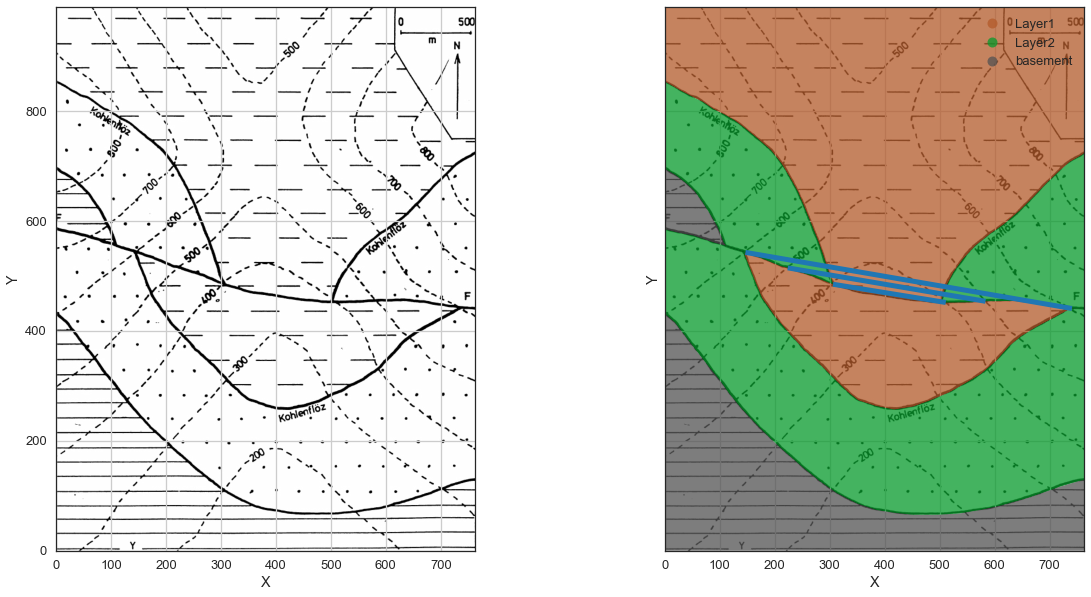

In [37]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols), aspect='equal')
# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)
strike_fault.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

Based on the strike lines and the calculated angles, we can conclude that the fault is dipping towards the south. Please take into account that the map was not digitized to scale. So angles are usually higher than expected for certain types of faults!

In [38]:
orientations_fault = gg.utils.calculate_orientations(strike_fault)
orientations_fault 

,X,Y,Z,dip,azimuth,polarity,formation
0,406.12,476.19,450.00,81.50,189.50,1,Fault1
1,423.66,487.94,550.00,81.94,189.71,1,Fault1


## Load Layer Data 
For the strike of the different layers we have to distinguish between layer 1 and layer 2 and between the two fault blocks. 

In [39]:
strike_layers = gpd.read_file('../../gemgis/data/examples/example4/lines_strike_layers.shp')
strike_layers

,id,Z,formation,geometry
0,1,300,Layer1,"LINESTRING (311.657 309.826, 497.763 279.280)"
1,2,400,Layer1,"LINESTRING (228.787 392.414, 586.856 331.605)"
2,3,500,Layer1,"LINESTRING (173.917 467.931, 644.272 386.192)"
3,4,600,Layer1,"LINESTRING (147.613 542.600, 740.436 440.496)"
4,1,200,Layer2,"LINESTRING (306.708 109.579, 546.835 69.416)"
5,2,300,Layer2,"LINESTRING (205.736 192.450, 205.736 192.450, ..."
6,3,400,Layer2,"LINESTRING (128.522 273.623, 763.204 175.762)"
7,4,500,Layer2,"LINESTRING (69.126 348.292, 760.941 241.946, 7..."
8,5,600,Layer2,"LINESTRING (2.943 428.617, 2.943 428.617, 2.94..."
9,5,500,Layer1,"LINESTRING (280.687 560.701, 532.976 517.710)"


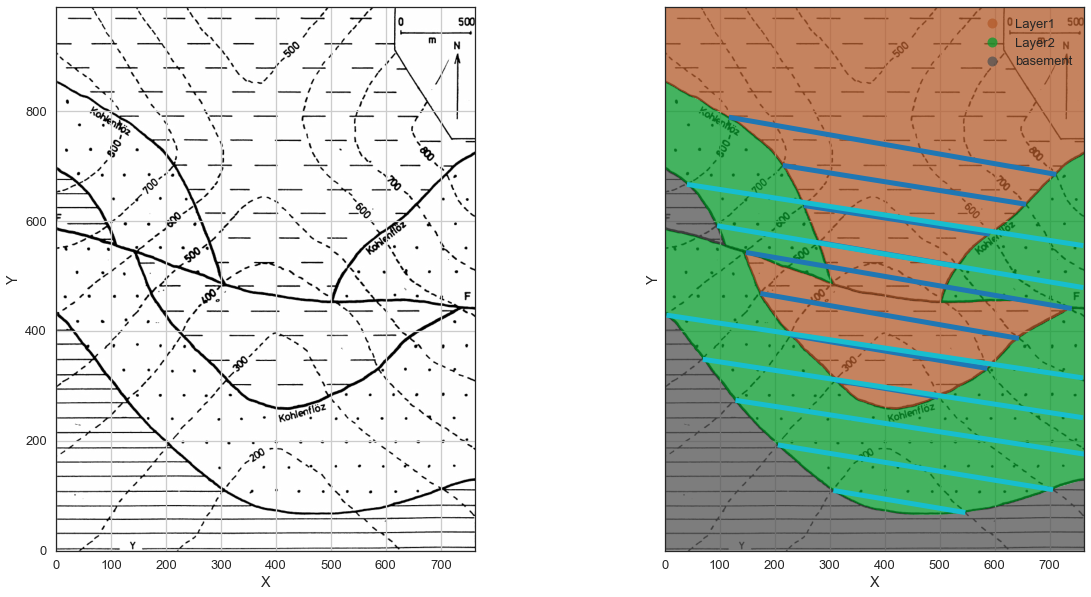

In [40]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols), aspect='equal')
# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
# orientations.plot(ax=ax2, column = 'formation', legend = False, s = 300)
strike_layers.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Separate Layers

In [41]:
gdf1 = strike_layers[strike_layers['formation'] == 'Layer1']
gdf1 = gdf1.reset_index()
gdf1

,index,id,Z,formation,geometry
0,0,1,300,Layer1,"LINESTRING (311.657 309.826, 497.763 279.280)"
1,1,2,400,Layer1,"LINESTRING (228.787 392.414, 586.856 331.605)"
2,2,3,500,Layer1,"LINESTRING (173.917 467.931, 644.272 386.192)"
3,3,4,600,Layer1,"LINESTRING (147.613 542.600, 740.436 440.496)"
4,9,5,500,Layer1,"LINESTRING (280.687 560.701, 532.976 517.710)"
5,10,6,600,Layer1,"LINESTRING (252.969 628.016, 591.240 575.974)"
6,11,7,700,Layer1,"LINESTRING (214.503 700.987, 657.423 630.279)"
7,12,8,800,Layer1,"LINESTRING (116.642 788.666, 712.293 684.583)"


In [42]:
gdf2 = strike_layers[strike_layers['formation'] == 'Layer2']
gdf2 = gdf2.reset_index()
gdf2

,index,id,Z,formation,geometry
0,4,1,200,Layer2,"LINESTRING (306.708 109.579, 546.835 69.416)"
1,5,2,300,Layer2,"LINESTRING (205.736 192.450, 205.736 192.450, ..."
2,6,3,400,Layer2,"LINESTRING (128.522 273.623, 763.204 175.762)"
3,7,4,500,Layer2,"LINESTRING (69.126 348.292, 760.941 241.946, 7..."
4,8,5,600,Layer2,"LINESTRING (2.943 428.617, 2.943 428.617, 2.94..."
5,13,6,800,Layer2,"LINESTRING (40.277 666.482, 761.507 555.044)"
6,14,7,700,Layer2,"LINESTRING (95.147 591.247, 761.507 478.679)"


In [43]:
gdf1_south = gdf1[gdf1['id']<= 4]
gdf1_south = gdf1_south.reset_index()
gdf1_south

,level_0,index,id,Z,formation,geometry
0,0,0,1,300,Layer1,"LINESTRING (311.657 309.826, 497.763 279.280)"
1,1,1,2,400,Layer1,"LINESTRING (228.787 392.414, 586.856 331.605)"
2,2,2,3,500,Layer1,"LINESTRING (173.917 467.931, 644.272 386.192)"
3,3,3,4,600,Layer1,"LINESTRING (147.613 542.600, 740.436 440.496)"


In [44]:
gdf1_north = gdf1[gdf1['id']> 4]
gdf1_north = gdf1_north.reset_index()
gdf1_north

,level_0,index,id,Z,formation,geometry
0,4,9,5,500,Layer1,"LINESTRING (280.687 560.701, 532.976 517.710)"
1,5,10,6,600,Layer1,"LINESTRING (252.969 628.016, 591.240 575.974)"
2,6,11,7,700,Layer1,"LINESTRING (214.503 700.987, 657.423 630.279)"
3,7,12,8,800,Layer1,"LINESTRING (116.642 788.666, 712.293 684.583)"


In [45]:
gdf2_south = gdf2[gdf2['id']<= 5]
gdf2_south = gdf2_south.reset_index()
gdf2_south

,level_0,index,id,Z,formation,geometry
0,0,4,1,200,Layer2,"LINESTRING (306.708 109.579, 546.835 69.416)"
1,1,5,2,300,Layer2,"LINESTRING (205.736 192.450, 205.736 192.450, ..."
2,2,6,3,400,Layer2,"LINESTRING (128.522 273.623, 763.204 175.762)"
3,3,7,4,500,Layer2,"LINESTRING (69.126 348.292, 760.941 241.946, 7..."
4,4,8,5,600,Layer2,"LINESTRING (2.943 428.617, 2.943 428.617, 2.94..."


In [46]:
gdf2_north = gdf2[gdf2['id']> 5]
gdf2_north = gdf2_north.reset_index()
gdf2_north

,level_0,index,id,Z,formation,geometry
0,5,13,6,800,Layer2,"LINESTRING (40.277 666.482, 761.507 555.044)"
1,6,14,7,700,Layer2,"LINESTRING (95.147 591.247, 761.507 478.679)"


## Calculate Orientations

In [47]:
orientations1_south = gg.utils.calculate_orientations(gdf1_south)
orientations1_south

,X,Y,Z,dip,azimuth,polarity,formation
0,406.27,328.28,350.00,56.16,189.57,1,Layer1
1,408.46,394.54,450.00,57.25,189.78,1,Layer1
2,426.56,459.30,550.00,55.20,189.81,1,Layer1


In [48]:
orientations1_north = gg.utils.calculate_orientations(gdf1_north)
orientations1_north

,X,Y,Z,dip,azimuth,polarity,formation
0,414.47,570.60,550.00,57.20,189.08,1,Layer1
1,429.03,633.81,650.00,56.97,188.95,1,Layer1
2,425.22,701.13,750.00,56.39,189.61,1,Layer1


In [49]:
orientations2_south = gg.utils.calculate_orientations(gdf2_south)
orientations2_south

,X,Y,Z,dip,azimuth,polarity,formation
0,483.44,128.12,271.43,56.52,189.26,1,Layer2
1,488.89,166.75,328.57,54.76,189.05,1,Layer2
2,496.55,256.31,460.00,57.00,188.75,1,Layer2
3,337.25,347.48,557.14,54.82,188.64,1,Layer2


In [50]:
orientations2_north = gg.utils.calculate_orientations(gdf2_north)
orientations2_north

,X,Y,Z,dip,azimuth,polarity,formation
0,414.61,572.86,750.00,54.78,189.15,1,Layer2


## Merge DataFrames

In [51]:
orientations_coords = pd.concat([orientations_fault, orientations1_south, orientations1_north, orientations2_south, orientations2_north]).reset_index()
orientations_coords

,index,X,Y,Z,dip,azimuth,polarity,formation
0,0,406.12,476.19,450.00,81.50,189.50,1,Fault1
1,1,423.66,487.94,550.00,81.94,189.71,1,Fault1
2,0,406.27,328.28,350.00,56.16,189.57,1,Layer1
3,1,408.46,394.54,450.00,57.25,189.78,1,Layer1
4,2,426.56,459.30,550.00,55.20,189.81,1,Layer1
5,0,414.47,570.60,550.00,57.20,189.08,1,Layer1
6,1,429.03,633.81,650.00,56.97,188.95,1,Layer1
7,2,425.22,701.13,750.00,56.39,189.61,1,Layer1
8,0,483.44,128.12,271.43,56.52,189.26,1,Layer2
9,1,488.89,166.75,328.57,54.76,189.05,1,Layer2


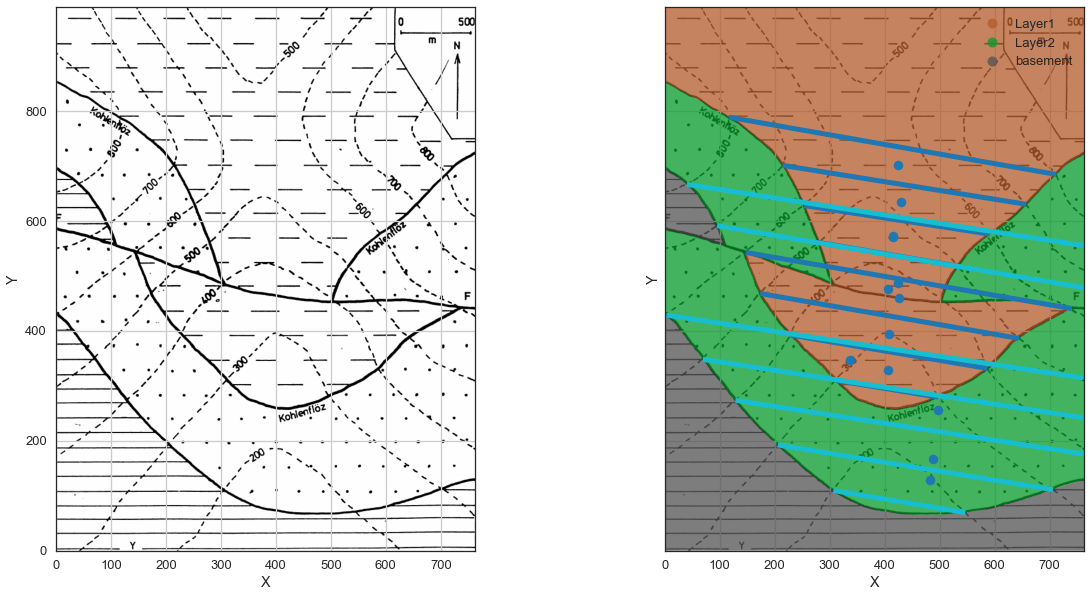

In [52]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(base_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the different elements on the geological map
geological_map.plot(ax=ax2, column = 'formation', alpha=0.75, legend=True, cmap=ListedColormap(cols), aspect='equal')
# topo.plot(ax=ax2, column = 'Z', legend = False, linewidth = 5)
# interfaces.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
ax2.scatter(orientations_coords['X'], orientations_coords['Y'])
strike_layers.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

In [53]:
orientations_coords

,index,X,Y,Z,dip,azimuth,polarity,formation
0,0,406.12,476.19,450.00,81.50,189.50,1,Fault1
1,1,423.66,487.94,550.00,81.94,189.71,1,Fault1
2,0,406.27,328.28,350.00,56.16,189.57,1,Layer1
3,1,408.46,394.54,450.00,57.25,189.78,1,Layer1
4,2,426.56,459.30,550.00,55.20,189.81,1,Layer1
5,0,414.47,570.60,550.00,57.20,189.08,1,Layer1
6,1,429.03,633.81,650.00,56.97,188.95,1,Layer1
7,2,425.22,701.13,750.00,56.39,189.61,1,Layer1
8,0,483.44,128.12,271.43,56.52,189.26,1,Layer2
9,1,488.89,166.75,328.57,54.76,189.05,1,Layer2
